# Project 7: Introduction to Machine Learning
- Author: Lindsay Foster
- Date: February 2025
- [Git Repository Link](https://github.com/LFoster03/datafun-07-ml)


In [69]:
# Import necessary libraries
import pandas as pd          # For data manipulation
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns       # For enhanced visualization
from sklearn.linear_model import LinearRegression  # For linear regression

# Part 1 - Chart a Straight Line

[(0, -17.77777777777778), (10, -12.222222222222223), (20, -6.666666666666667), (30, -1.1111111111111112), (40, 4.444444444444445), (50, 10.0), (60, 15.555555555555557), (70, 21.11111111111111), (80, 26.666666666666668), (90, 32.22222222222222), (100, 37.77777777777778)]


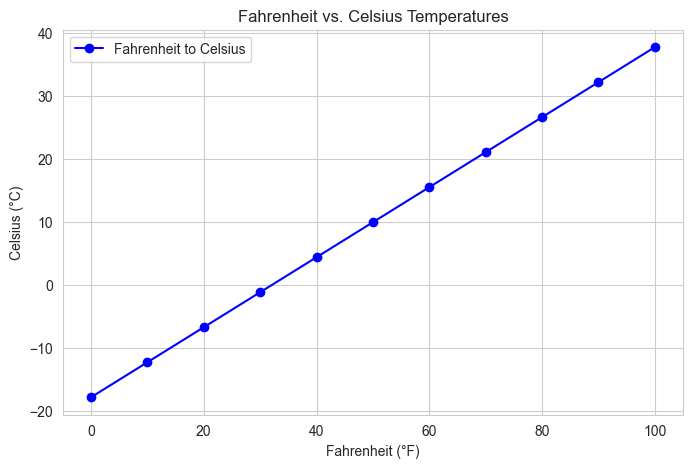

In [70]:
# Step 1: Define the lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5 / 9 * (f - 32)

# Step 2: Generate the list of Fahrenheit to Celsius pairs (0 to 100 in increments of 10)
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Print out the Fahrenheit/Celsius pairs
print(temps)

# Step 3: Plot the Fahrenheit and Celsius temperatures

import matplotlib.pyplot as plt

# Extract Fahrenheit and Celsius values from the temps list of tuples
fahrenheit = [f for f, _ in temps]
celsius = [temp for _, temp in temps]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(fahrenheit, celsius, marker='o', linestyle='-', color='b', label='Fahrenheit to Celsius')
plt.title('Fahrenheit vs. Celsius Temperatures')
plt.xlabel('Fahrenheit (°F)')
plt.ylabel('Celsius (°C)')
plt.grid(True)
plt.legend()
plt.show()


# Data Acquisition and Inspection

In [71]:
import pandas as pd

# Load the data from the CSV file into a DataFrame
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Display the first few rows of the DataFrame to get an overview
print("Head of the DataFrame:")
print(nyc.head())

# Display the last few rows of the DataFrame to see the tail
print("\nTail of the DataFrame:")
print(nyc.tail())


Head of the DataFrame:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Tail of the DataFrame:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


# Data Cleaning

In [72]:
# Rename the columns of the DataFrame
nyc.columns = ['Date', 'Temperature', 'Anomaly']

# Display the first 3 rows to verify the column names
print(nyc.head(3))


     Date  Temperature  Anomaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9


In [73]:
# Remove the last two characters from each Date value (which are "01" for January)
nyc['Date'] = nyc['Date'].astype(str).str[:-2].astype(int)

# Check the first few rows to ensure the change
print(nyc.head(3))


   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9


   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9


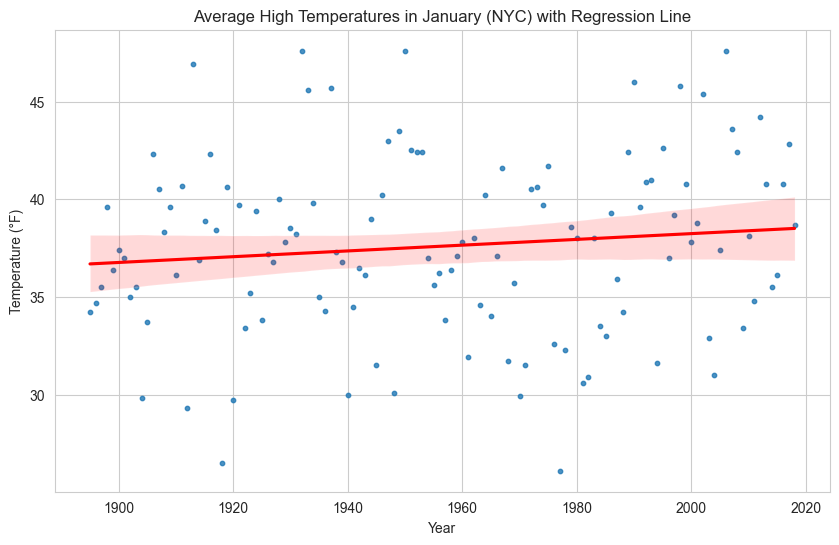

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame (make sure the CSV is in the correct path)
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Rename columns for better readability
nyc.columns = ['Date', 'Temperature', 'Anomaly']

# Perform integer division by 100 to truncate the last two digits from the Date column
nyc.Date = nyc.Date.floordiv(100)

# Check the first few rows to confirm the changes
print(nyc.head(3))

# Plot the data with Seaborn (including a regression line)
plt.figure(figsize=(10, 6))
sns.regplot(x='Date', y='Temperature', data=nyc, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Average High Temperatures in January (NYC) with Regression Line')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.show()


# Calculating Basic Descriptive Statistics

In [75]:
# Call describe on the 'Temperature' column for quick statistics
temperature_stats = nyc['Temperature'].describe()

# Print the statistics
print(temperature_stats)

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


In [76]:
import pandas as pd

# Assuming the 'nyc' DataFrame is already loaded and cleaned

# Set display precision to 2 decimal places
pd.set_option('display.precision', 2)

# Calculate basic descriptive statistics for the 'Temperature' column
temperature_stats = nyc['Temperature'].describe()

# Display the descriptive statistics
print(temperature_stats)


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


# Build the Model

In [77]:
import pandas as pd
from scipy import stats

# Ensure that 'Date' and 'Temperature' are numeric
nyc['Date'] = pd.to_numeric(nyc['Date'], errors='coerce')  # Convert 'Date' to numeric, coerce errors to NaN
nyc['Temperature'] = pd.to_numeric(nyc['Temperature'], errors='coerce')  # Convert 'Temperature' to numeric

# Drop any rows with NaN values (if present after coercion)
nyc = nyc.dropna(subset=['Date', 'Temperature'])

# Perform linear regression using linregress
linear_regression = stats.linregress(x=nyc['Date'], y=nyc['Temperature'])

# Extract slope and intercept
slope = linear_regression.slope
intercept = linear_regression.intercept

# Display the slope and intercept
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")


Slope: 0.01
Intercept: 8.69


# Predictions

In [78]:
# Predict the average temperature for January 2024
year_2024 = 2024
predicted_temperature_2024 = linear_regression.slope * year_2024 + linear_regression.intercept

# Display the predicted temperature
print(f"Predicted average temperature for January 2024: {predicted_temperature_2024:.2f}°F")

Predicted average temperature for January 2024: 38.59°F


# Plotting

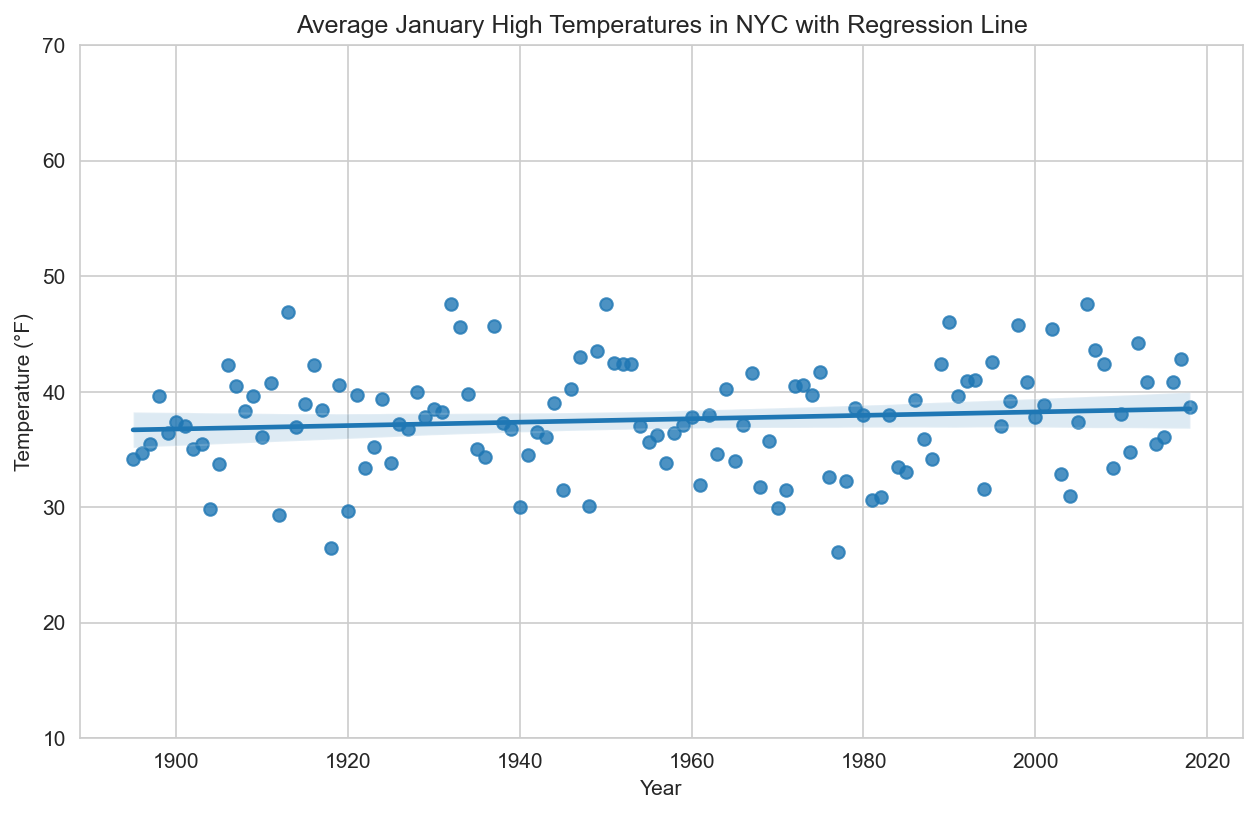

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for the plot
sns.set_style('whitegrid')

# Increase the DPI to make the plot clearer
plt.figure(figsize=(10, 6), dpi=150)  # Increase the figure size and DPI

# Create the plot with regplot (scatter plot + regression line)
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

# Adjust the y-axis scale to emphasize the linear relationship (set limits)
axes.set_ylim(10, 70)

# Add labels and title to the plot
axes.set_xlabel('Year')
axes.set_ylabel('Temperature (°F)')
axes.set_title('Average January High Temperatures in NYC with Regression Line')

# Show the plot
plt.show()
